### Imports

In [1]:
import jax.numpy as jnp
from jax import jit
from pekf.ekf import filter_routine, MVNormalParameters
from pekf.models.bearings import get_data, make_parameters, plot_bearings

### Input parameters

In [2]:
s1 = jnp.array([-1.5, 0.5])  # First sensor location
s2 = jnp.array([1., 1.])  # Second sensor location
r = 0.5  # Observation noise (stddev)
dt = 0.01  # discretization time step
x0 = jnp.array([0.1, 0.2, 1, 0])  # initial true location
qc = 0.01  # discretization noise
qw = 10  # discretization noise

T = 500  # number of observations

/u/95/corenfa1/unix/PycharmProjects/parallelEKF/venv/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


### Get parameters

In [3]:
Q, R, observation_function, transition_function = make_parameters(qc, qw, r, dt, s1, s2)

### Get data

In [13]:
ts, true_states, observations = get_data(x0, dt, r, T, s1, s2, 0)

### Plot the data

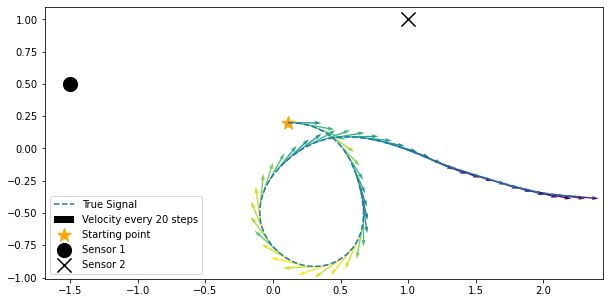

In [14]:
plot_bearings(true_states, s1, s2, figsize=(10, 5))

### We can now run the filter

Initial state guess

In [15]:
m = jnp.array([-1, -1, 0, 0, 0], dtype=jnp.float32)
P = jnp.eye(5, dtype=jnp.float32)

initial_guess = MVNormalParameters(m, P)

Run the filter

In [16]:
jitted_filter_routine = jit(filter_routine, static_argnums=(2, 4))  # transition_function and observation_function 

initial_linearization_points = jnp.zeros((T, 5), dtype=jnp.float32)
filtered_states = jitted_filter_routine(initial_guess, observations, transition_function, Q, observation_function, R, initial_linearization_points)

In [20]:
%%time
for _ in range(100):
    filtered_states = jitted_filter_routine(initial_guess, observations, transition_function, Q, observation_function, R, filtered_states.mean)

CPU times: user 713 ms, sys: 5.25 ms, total: 718 ms
Wall time: 629 ms


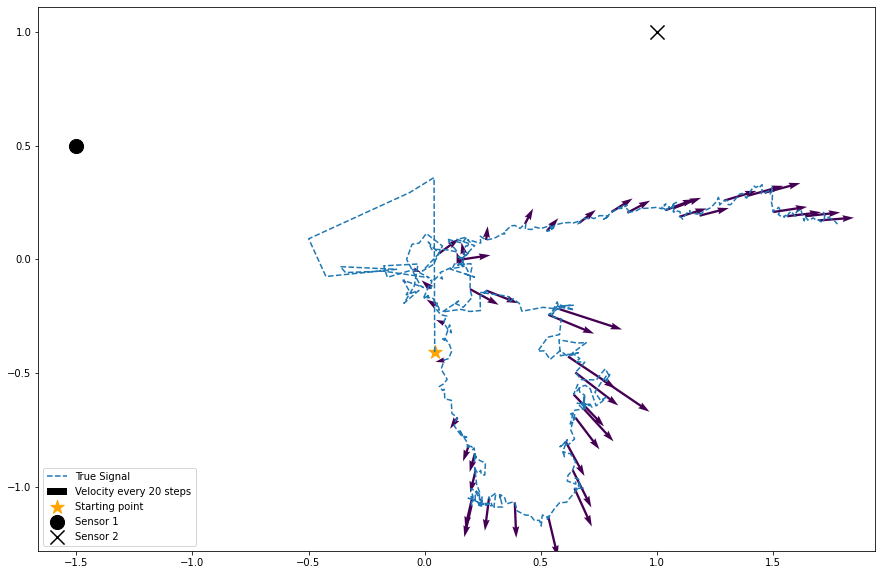

In [23]:
plot_bearings(filtered_states.mean, s1, s2, figsize=(15, 10))
